In [93]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [111]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage

In [95]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [96]:
data = pd.read_csv("Mall_Customers.csv")

In [97]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [98]:
# Describe the data
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [99]:
# Drop the customer ID
data = data.drop(columns=['CustomerID'])

In [100]:
# One-hot encode the Gender column
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


In [101]:
# standardize the features to have zero mean and unit variance, which is important for many clustering algorithms
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


<Figure size 1500x900 with 0 Axes>

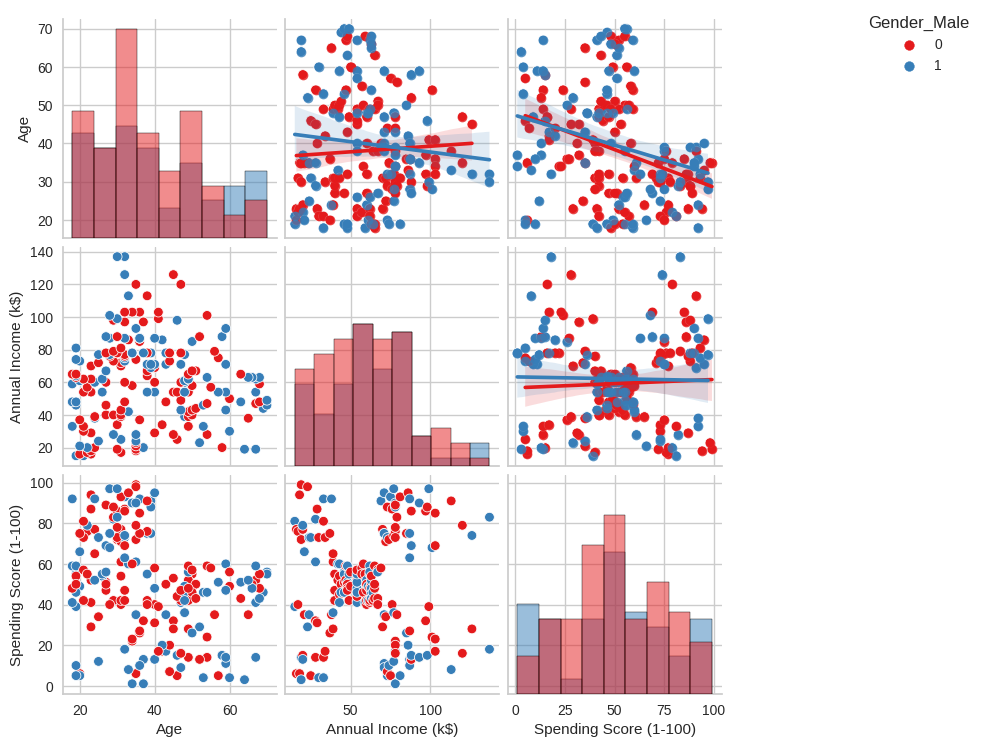

In [102]:
plt.figure(figsize=(15,9))
ax=sns.pairplot(data=data,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender_Male',
             palette='Set1',diag_kind='hist',kind='scatter')
ax.map_upper(sns.regplot)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1100x800 with 0 Axes>

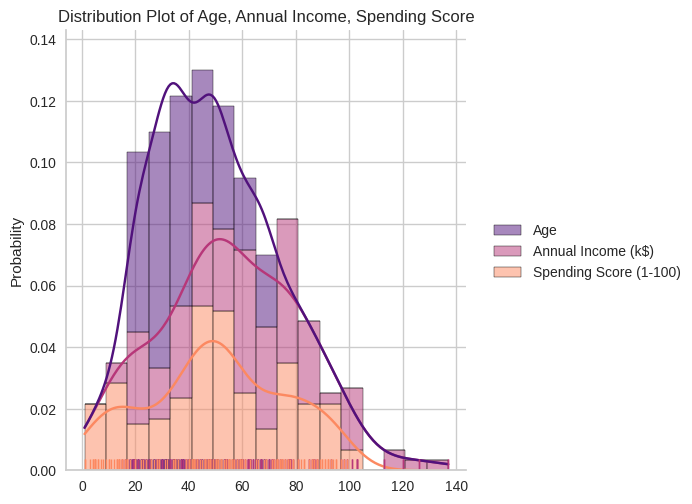

In [103]:
plt.figure(figsize=(11,8))
sns.displot(data=data[[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']],multiple='stack',kde=True,palette='magma',rug=True,stat='probability')
plt.title('Distribution Plot of Age, Annual Income, Spending Score')
plt.show()

In [104]:
# Using k means Algorithm
kmeans = KMeans(n_clusters=5, random_state=0)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

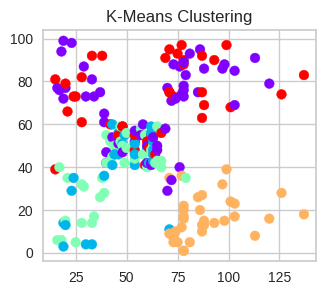

<Figure size 800x550 with 0 Axes>

In [105]:
# Visualize the clusters
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.scatter(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='rainbow')
plt.title('K-Means Clustering')
plt.show()
plt.tight_layout()

In [106]:
# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5)
data['Agg_Cluster'] = agg_cluster.fit_predict(scaled_data)

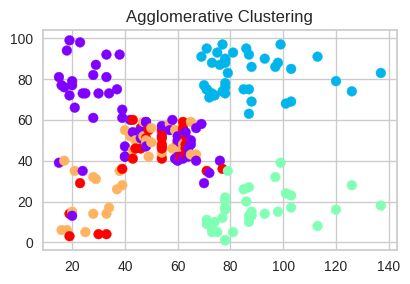

In [107]:
# Visualizing the Clusters
plt.figure(figsize=(12, 3))
plt.subplot(132)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agg_Cluster'], cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.tight_layout()

In [145]:
X=data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [153]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

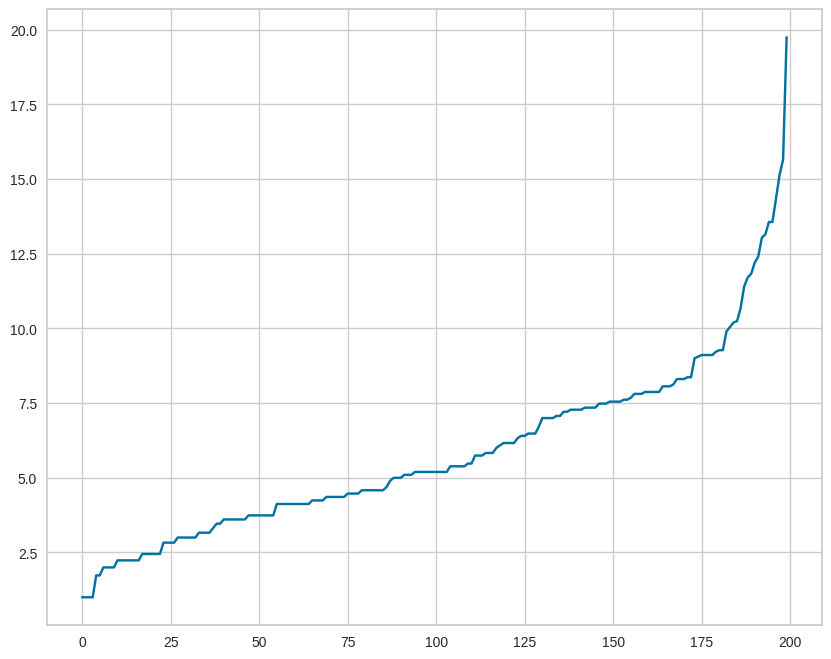

In [154]:
ep,count = NearestNeighbors(n_neighbors=20).fit(X).kneighbors(X) #arbitrary n_neighbors value
ep = np.sort(ep, axis=0)
plt.figure(figsize=(10,8))
plt.plot(ep[:,1])
plt.show()

Text(0.5, 1.0, 'DBSCAN Clustering')

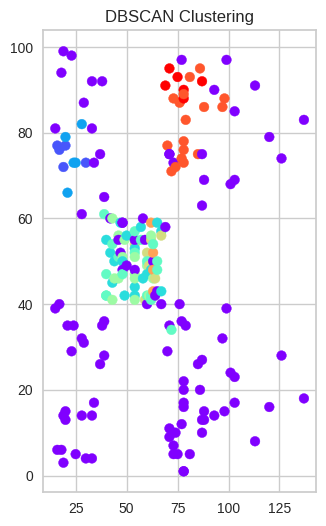

In [156]:
plt.figure(figsize=(12, 6))
plt.subplot(133)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering')

In [157]:
# Compute metrics for K-Means
silhouette_kmeans = silhouette_score(scaled_data, data['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(scaled_data, data['KMeans_Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(scaled_data, data['KMeans_Cluster'])

In [158]:
print("K-Means Silhouette Score:", silhouette_kmeans)
print("K-Means Calinski-Harabasz Index:", calinski_kmeans)
print("K-Means Davies-Bouldin Index:", davies_bouldin_kmeans)

K-Means Silhouette Score: 0.3158052954954325
K-Means Calinski-Harabasz Index: 71.08460225936194
K-Means Davies-Bouldin Index: 1.1466779182877074


In [159]:
# Compute metrics for Agglomerative Clustering
silhouette_agg = silhouette_score(scaled_data, data['Agg_Cluster'])
calinski_agg = calinski_harabasz_score(scaled_data, data['Agg_Cluster'])
davies_bouldin_agg = davies_bouldin_score(scaled_data, data['Agg_Cluster'])


In [160]:
print("\nAgglomerative Silhouette Score:", silhouette_agg)
print("Agglomerative Calinski-Harabasz Index:", calinski_agg)
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_agg)


Agglomerative Silhouette Score: 0.28699413201651747
Agglomerative Calinski-Harabasz Index: 64.46870730105833
Agglomerative Davies-Bouldin Index: 1.2197730790225612


In [161]:
# Compute metrics for DBSCAN
if len(np.unique(data['DBSCAN_Cluster'])) > 1:
    silhouette_dbscan = silhouette_score(scaled_data, data['DBSCAN_Cluster'])
    calinski_dbscan = calinski_harabasz_score(scaled_data, data['DBSCAN_Cluster'])
    davies_bouldin_dbscan = davies_bouldin_score(scaled_data, data['DBSCAN_Cluster'])
else:
    silhouette_dbscan = calinski_dbscan = davies_bouldin_dbscan = "Not applicable (single cluster)"

In [162]:
print("\nDBSCAN Silhouette Score:", silhouette_dbscan)
print("DBSCAN Calinski-Harabasz Index:", calinski_dbscan)
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_dbscan)


DBSCAN Silhouette Score: 0.012015057781900533
DBSCAN Calinski-Harabasz Index: 12.099397092470905
DBSCAN Davies-Bouldin Index: 1.3894410235842227
